In [2]:
import scipy
import numpy as np 
import matplotlib.pyplot as plt 

In [6]:
f = np.random.rand(32) * 1e-20 + 1

print(f) 

for i in range(1000): 
    fhat = scipy.fft.fft(f) 
    f = scipy.fft.ifft(fhat) 

print(f - 1)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]
[0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j
 0.+0.j 0.+0.j]


In [ ]:


from chebfftPy import chebfft

def cheby_exgrid(N,a,b):
    i=np.linspace(0,N,N+1)
    return (b-a)/2.*(-np.cos(i*np.pi/N))+(b+a)/2.0

def cheby_poly(x,n):
    T0 = 1.0
    T1 = x
    if n == 0:
        return  T0
    elif n == 1:
        return  T1
    elif n > 1:
        for i in range(n-1):
            T = 2*x*T1-T0 
            T0 = T1
            T1 = T
        return T

def cheby_coeff(x,y,N):
    a = []
    y[0] *= 0.5
    y[N] *= 0.5

    x_chebgrid = cheby_exgrid(N,-1.0,1.0)
    print(x,x_chebgrid)
    for j in range(N+1):
        sum = 2.0 / N  * np.sum(y*cheby_poly(x_chebgrid,j))
        a.append(sum)

    y[0] /= 0.5
    y[N] /= 0.5
    return a

def cheby_interp(x,coeff,N,a,b):

    x_chebgrid = ( 2.0 * x - a  - b ) / ( b-a);
    sum  = coeff[0]*cheby_poly(x_chebgrid,0) * 0.5    
    for j in range(1,N-1):
        sum += coeff[j]*cheby_poly(x_chebgrid,j)
    sum += coeff[N]*cheby_poly(x_chebgrid,N) * 0.5
    return sum


'''
f = np.loadtxt('test')[:,[0,1]]

plt.plot(f)
plt.show()
N = np.shape(f)[0]-1

xx     = cheby_exgrid(40,f[0,0],f[-1,0])
coeff  = cheby_coeff (f[:,0],f[:,1],N)
interp = cheby_interp(xx,coeff,N,f[0,0],f[-1,0])

print( cheby_interp(0.504897,coeff,N,f[0,0],f[-1,0]))
plt.plot(f[:,0],f[:,1],'>',xx,interp,'.')
plt.show()
'''
# test it with sin(x)
# a = 1.
# b = 2.
# x = cheby_exgrid(N,a,b)
# f = np.sin(5.*x)
# xx = np.linspace(a,b,11)

# coeff = cheby_coeff(x,f,N)
# interp =  cheby_interp(xx,coeff,N,a,b)
# plt.plot(x,f,'-',xx,interp,'.')
# plt.show()


In [ ]:

from chebfftPy import chebfft

class ChebyshevScheme(Scheme):
    

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
from chebfftPy import chebfft
from numpy import pi,linspace,sin,cos,exp,round,zeros,arange,real, flipud
from numpy.fft import fft,ifft
from matplotlib.pyplot import figure,subplot,plot,grid,title,axis

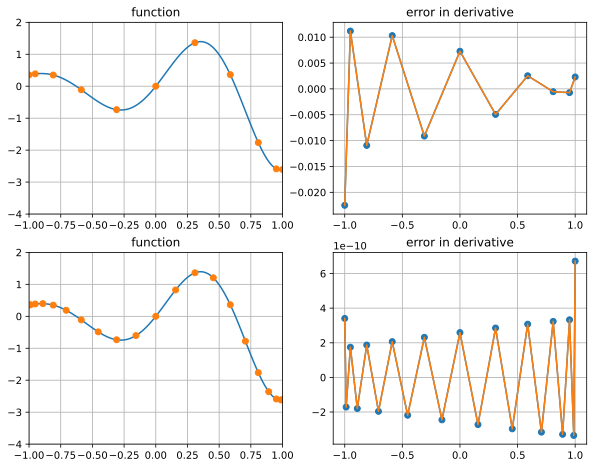

In [ ]:
figure(figsize=(10,12))
plot_count = 1

for N in [10,20]:
    xx = linspace(-1.0,1.0,100)
    ff = exp(xx)*sin(5*xx)
    x = cos(arange(0,N+1)*pi/N)
    f = exp(x)*sin(5*x)
    error = chebfft(f) - exp(x)*(sin(5*x)+5*cos(5*x))
    subplot(3,2,plot_count)
    plot_count +=1
    plot(xx,ff,'-',x,f,'o')
    grid(True)
    axis([-1, 1, -4,2])
    title('function')
    subplot(3,2,plot_count)
    plot_count +=1
    plot(x,error,'-o')
    title('error in derivative')
    plot(x,error) 
    grid(True)